### Nighttime light satellite imagery analytics

In [1]:
%load_ext autotime

import os
import numpy as np
import seaborn as sns
from osgeo import gdal
import matplotlib.cm as cm
import matplotlib.pylab as plt
%matplotlib inline

#download VIIRS DNB from https://www.ngdc.noaa.gov/eog/viirs/download_dnb_composites.html
path2016 = "/Users/hayashiyus/Documents/R/imagery_key/japan_islands/small_16000-6800-5500-4200_VIIRS-2016-10.tif"

#read geotiff image
ds = gdal.Open(path2016)
#extract light intensity data
img = np.array(ds.GetRasterBand(1).ReadAsArray())
#formatting light intensity data
arr = img.reshape((1,img.size))

print(img.shape)
print(img.dtype)
print(img.size)

(4200, 5500)
float32
23100000


 [1] Xintong Li, Xinran Wang, Jiang Zhang and Lingfei Wu, Allometric scaling, size distribution and pattern formation of natural cities. Palgrave Communications, August 2015.
<img  src="http://www.palgrave-journals.com/article-assets/palgrave/palcomms/2015/palcomms201517/images_hires/w926/palcomms201517-f1.jpg"/>
<img  src="http://www.palgrave-journals.com/article-assets/palgrave/palcomms/2015/palcomms201517/images_hires/w926/palcomms201517-f2.jpg"/>
<img  src="http://www.palgrave-journals.com/article-assets/palgrave/palcomms/2015/palcomms201517/images_hires/w926/palcomms201517-f7.jpg"/>
・Examples of rank-size distribution and allometry relationship of natural cities. 

In [2]:
#plot image function
def plot_images(images,shape=None):
    if shape is None:
        shape = (1, len(images))
    for i, image in enumerate(images):
        s = plt.subplot(shape[0],shape[1],i + 1)
        s.set_xticklabels([])
        s.set_yticklabels([])
        s.yaxis.set_ticks_position('none')
        s.xaxis.set_ticks_position('none')
        #if image.dim
        if image.ndim == 3:
            plt.imshow(image[:,:,::-1])
        else:
            plt.imshow(image, cmap='gray')
    plt.show()

#cutting geotiff image function
def make_slice(ulx, uly, lrx, lry, in_path, out_path):
    subprocess.call(['gdal_translate', "-projwin", str(ulx), str(uly), str(lrx), str(lry), in_path , out_path+".tif"])

#read geotif and return uint8 image
def read_img(path):
    ds = gdal.Open(path)
    img = np.array(ds.GetRasterBand(1).ReadAsArray())
    #print(img.dtype)
    return img

time: 13.2 ms


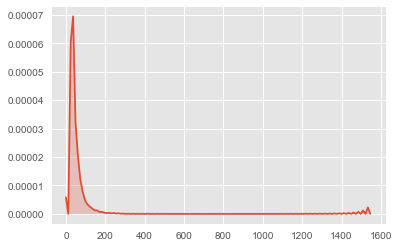

time: 5.72 s


In [3]:
with plt.style.context(('ggplot')):
    sns.kdeplot(arr[0],shade=True)

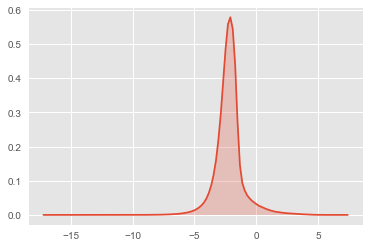

time: 5.73 s


In [4]:
with plt.style.context(('ggplot')):
    sns.kdeplot(np.log(arr[0]),shade=True)

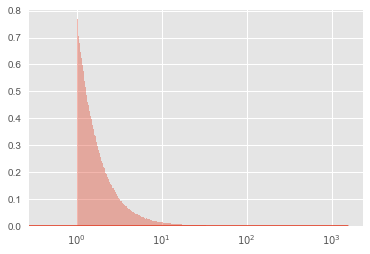

time: 8.54 s


In [5]:
bins = np.logspace(0.01, 3, 500)

with plt.style.context(('ggplot')):
    sns.distplot(arr[0], bins=bins, kde=True)
    plt.gca().set_xscale("log")
plt.show()

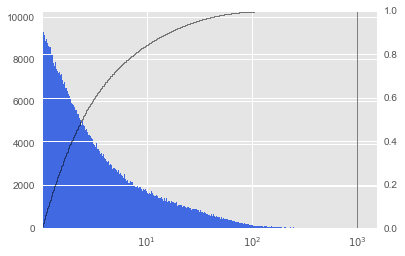

time: 4.39 s


In [6]:
fig = plt.figure()

with plt.style.context(('ggplot')):

    ax1 = fig.add_subplot(111)
    n, bins, patches = ax1.hist(arr[0], bins=bins, color='royalblue') # histogram
    fig.gca().set_xscale("log")
    ax1.set_xlim(arr[0].min(), arr[0].max())

    ax2 = ax1.twinx() # another y-axis
    n, bins, patches = ax2.hist(arr[0], bins=bins, cumulative=True, normed=True, histtype='step', ec='k') # cumulative
    ax2.set_xlim(arr[0].min(), arr[0].max())
    ax2.set_ylim(0, 1)

plt.show()

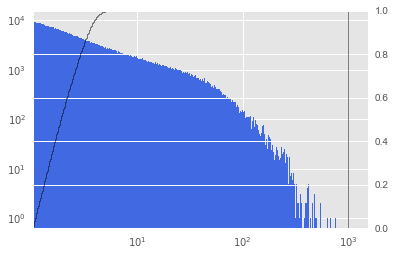

time: 4.79 s


In [7]:
fig = plt.figure()

with plt.style.context(('ggplot')):

    ax1 = fig.add_subplot(111)
    n, bins, patches = ax1.hist(arr[0], bins=bins, log=True, color='royalblue') # histogram
    fig.gca().set_xscale("log")
    ax1.set_xlim(arr[0].min(), arr[0].max())

    ax2 = ax1.twinx() # another y-axis
    n, bins, patches = ax2.hist(np.log(arr[0]), bins=bins, cumulative=True, normed=True, histtype='step', ec='k') # cumulative
    ax2.set_xlim(arr[0].min(), arr[0].max())
    ax2.set_ylim(0, 1)

plt.show()

In [3]:
path2016 = "/Users/hayashiyus/Documents/R/imagery_key/japan_islands/small_16000-6800-5500-4200_VIIRS-2016-04.tif"
img2016 = read_img(path2016)
path2015 = "/Users/hayashiyus/Documents/R/imagery_key/japan_islands/small_16000-6800-5500-4200_VIIRS-2015-04.tif"
img2015 = read_img(path2015)
path2014 = "/Users/hayashiyus/Documents/R/imagery_key/japan_islands/small_16000-6800-5500-4200_VIIRS-2014-04.tif"
img2014 = read_img(path2014)
path2013 = "/Users/hayashiyus/Documents/R/imagery_key/japan_islands/small_16000-6800-5500-4200_VIIRS-2013-04.tif"
img2013 = read_img(path2013)
path2012 = "/Users/hayashiyus/Documents/R/imagery_key/japan_islands/small_16000-6800-5500-4200_VIIRS-2012-04.tif"
img2012 = read_img(path2012)

path2016_kanto = "/Users/hayashiyus/Documents/R/imagery_key/kanto_region/small_18700-9100-800-600_VIIRS-2016-04.tif"
img2016_kanto = read_img(path2016_kanto)

#making light intensity data
img1615 = img2016 - img2015
img1614 = img2016 - img2014
img1613 = img2016 - img2013
img1612 = img2016 - img2012

#formatting light intensity data
arr_diff1615 = img1615.reshape((1,img1615.size))
arr_diff1614 = img1614.reshape((1,img1614.size))
arr_diff1613 = img1613.reshape((1,img1613.size))
arr_diff1612 = img1612.reshape((1,img1612.size))

time: 1.25 s


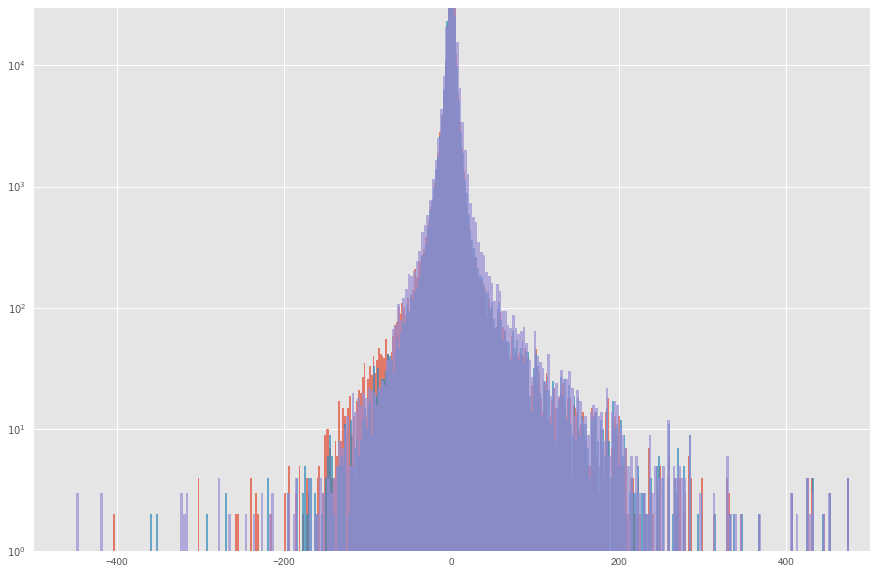

time: 14.8 s


In [13]:
plt.figure(figsize = (15,10))

with plt.style.context(('ggplot')):
    plt.hist(arr_diff1615[0], bins=2000, log = True, alpha=0.7)
    plt.hist(arr_diff1614[0], bins=2000, log = True, alpha=0.7)
    plt.hist(arr_diff1613[0], bins=2000, log = True, alpha=0.7)
    
#plt.xscale('log')
plt.xlim(-500,500)
plt.ylim(0,30000)
plt.show()

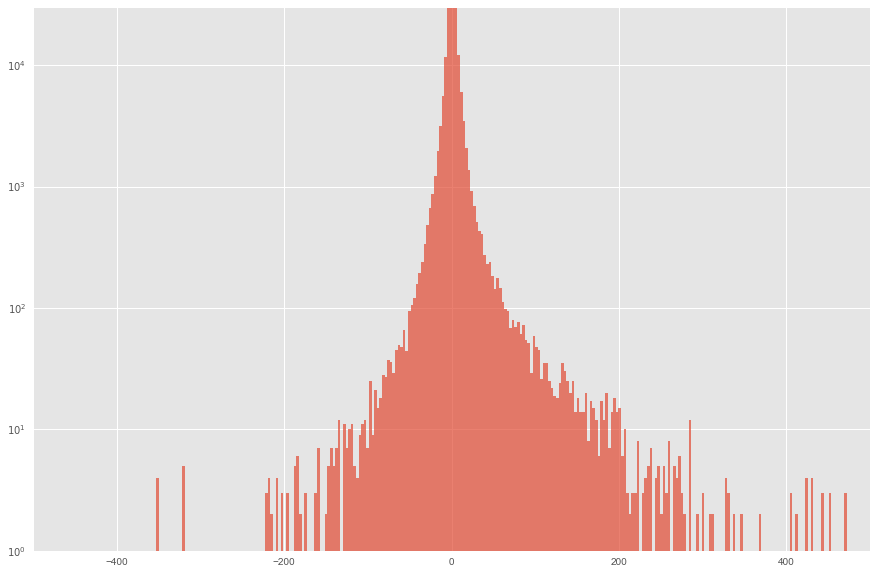

time: 5.21 s


In [14]:
plt.figure(figsize = (15,10))

with plt.style.context(('ggplot')):    
    plt.hist(arr_diff1612[0], bins=2000, log = True, alpha=0.7)
    
#plt.xscale('log')
plt.xlim(-500,500)
plt.ylim(0,30000)
plt.show()

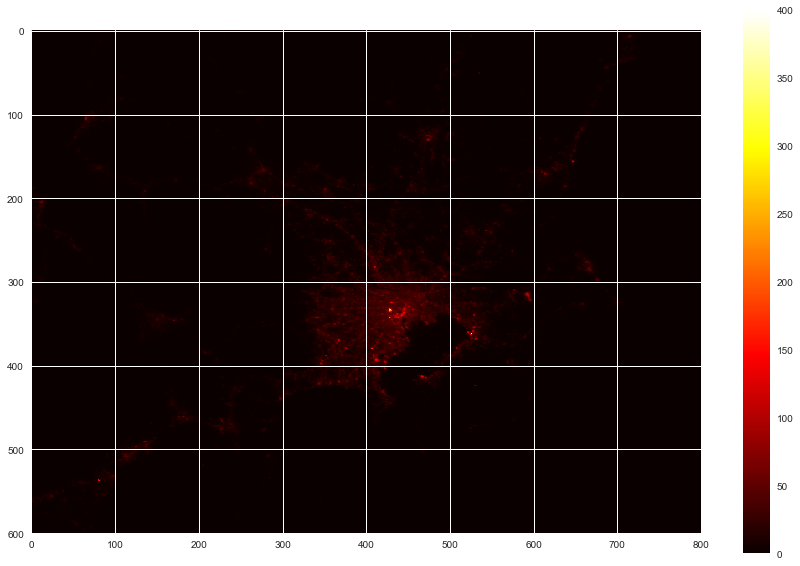

time: 460 ms


In [5]:
plt.figure(figsize = (15,10))
plt.imshow(img2016_kanto, clim=(0, 400), cmap = 'hot')
plt.colorbar()
plt.show()

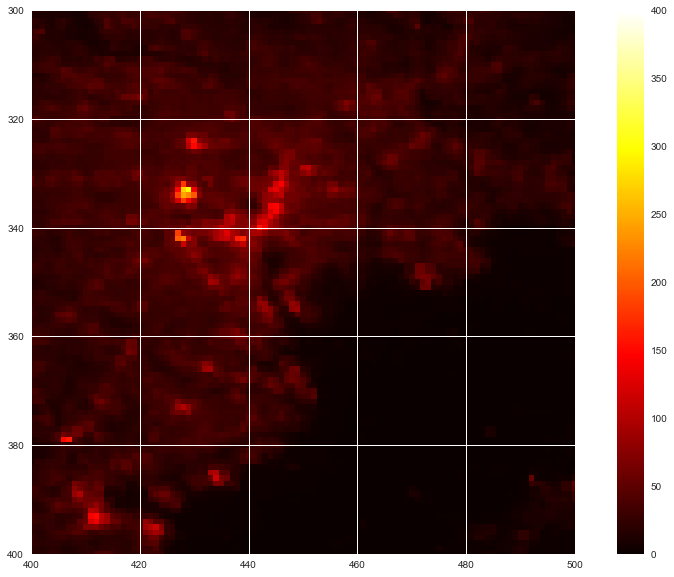

time: 364 ms


In [6]:
plt.figure(figsize = (15,10))
plt.imshow(img2016_kanto, clim=(0, 400), cmap = 'hot')
plt.xlim(400,500)
plt.ylim(400,300)
plt.colorbar()
plt.show()

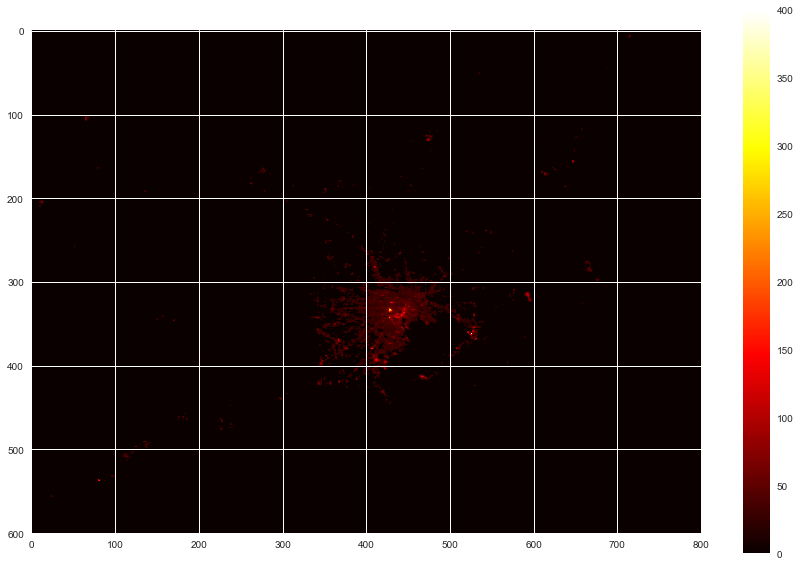

time: 373 ms


In [7]:
img2016_kanto[img2016_kanto < 20] = 0

plt.figure(figsize = (15,10))
plt.imshow(img2016_kanto, clim=(0, 400), cmap = 'hot')
plt.colorbar()
plt.show()

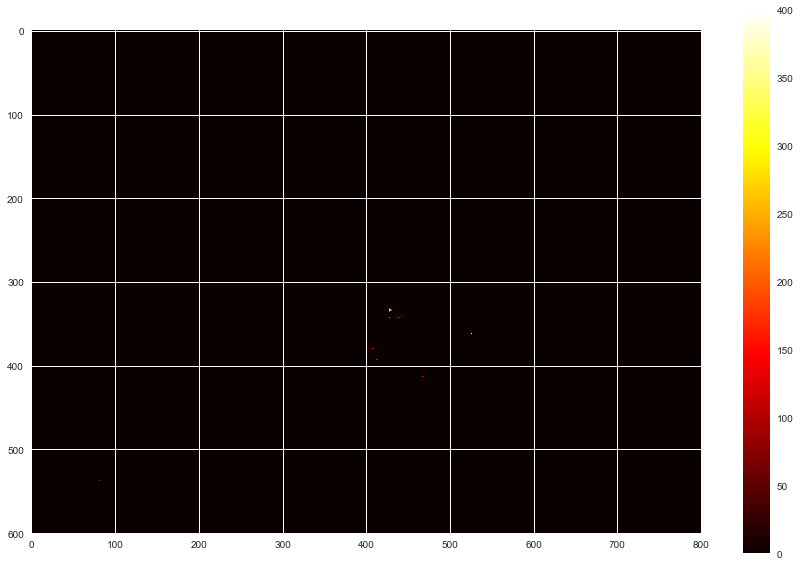

time: 422 ms


In [11]:
img2016_kanto[img2016_kanto < 150] = 0

plt.figure(figsize = (15,10))
plt.imshow(img2016_kanto, clim=(0, 400), cmap = 'hot')
plt.colorbar()
plt.show()

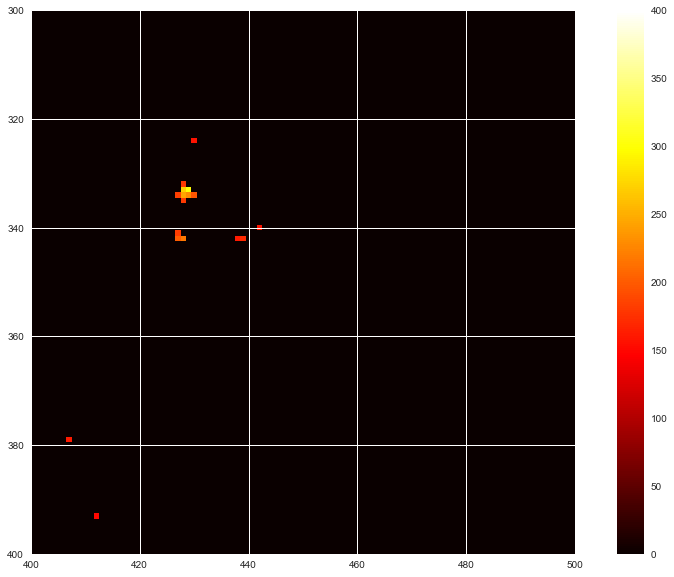

time: 337 ms


In [12]:
plt.figure(figsize = (15,10))
plt.imshow(img2016_kanto, clim=(0, 400), cmap = 'hot')
plt.xlim(400,500)
plt.ylim(400,300)
plt.colorbar()
plt.show()

In [15]:
'''
def crop(img, x1, x2, y1, y2):
    """
    Return the cropped image at the x1, x2, y1, y2 coordinates
    """
    if x2 == -1:
        x2=img.shape[1]-1
    if y2 == -1:
        y2=img.shape[0]-1

    mask = np.zeros(img.shape)
    mask[y1:y2+1, x1:x2+1]=1
    m = mask>0

    return img[m].reshape((y2+1-y1, x2+1-x1))

img_cropped = crop(img, 240, 290, 255, 272)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(img)
ax2.imshow(img_cropped)

plt.show()
'''

'\ndef crop(img, x1, x2, y1, y2):\n    """\n    Return the cropped image at the x1, x2, y1, y2 coordinates\n    """\n    if x2 == -1:\n        x2=img.shape[1]-1\n    if y2 == -1:\n        y2=img.shape[0]-1\n\n    mask = np.zeros(img.shape)\n    mask[y1:y2+1, x1:x2+1]=1\n    m = mask>0\n\n    return img[m].reshape((y2+1-y1, x2+1-x1))\n\nimg_cropped = crop(img, 240, 290, 255, 272)\n\nfig = plt.figure()\nax1 = fig.add_subplot(121)\nax2 = fig.add_subplot(122)\n\nax1.imshow(img)\nax2.imshow(img_cropped)\n\nplt.show()\n'

time: 2.53 ms


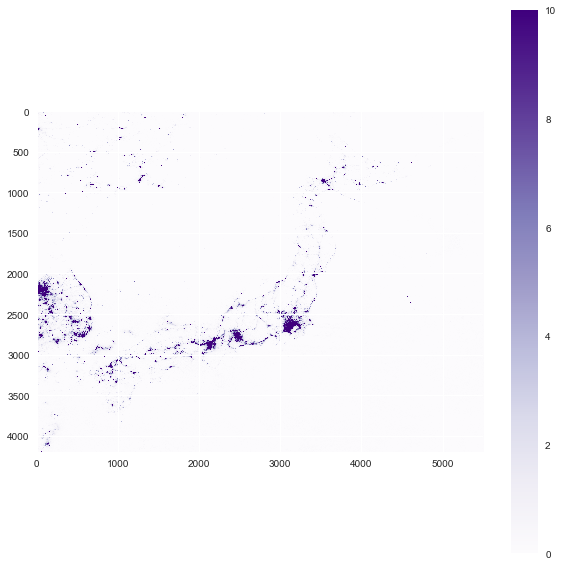

time: 1.39 s


In [16]:
plt.figure(figsize = (10,10))

plt.subplot(111)
plt.imshow(img2016, clim=(0, 10), cmap='Purples')
plt.colorbar()
plt.show()

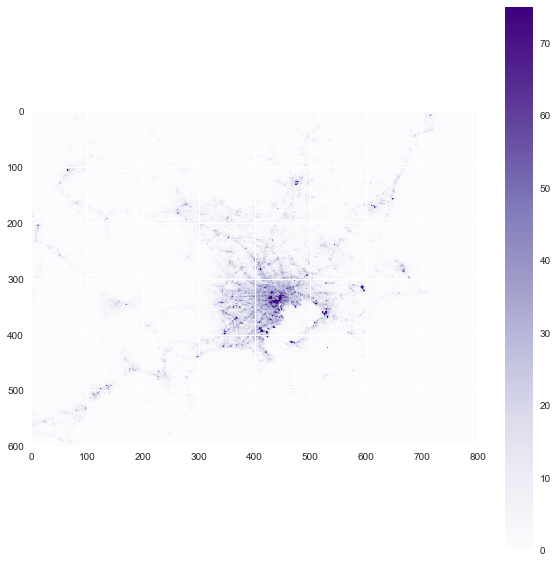

time: 367 ms


In [9]:
path2016_kanto = "/Users/hayashiyus/Documents/R/imagery_key/kanto_region/small_18700-9100-800-600_VIIRS-2016-04.tif"
img2016_kanto = read_img(path2016_kanto)

plt.figure(figsize = (10,10))

plt.subplot(111)
plt.imshow(img2016_kanto, clim=(0, 75), cmap='Purples')
plt.colorbar()
plt.show()

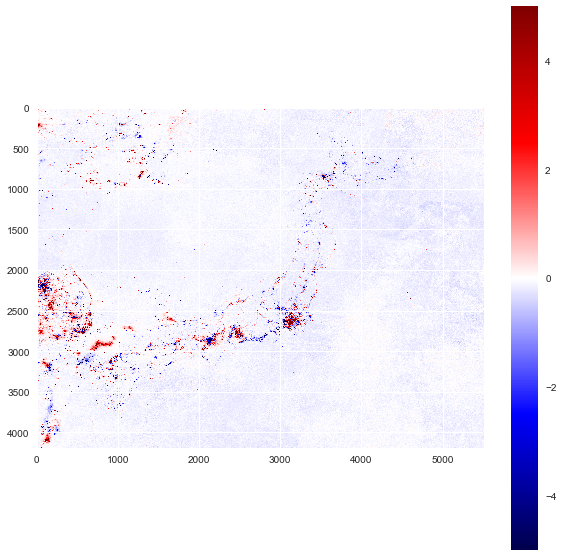

time: 1.4 s


In [18]:
plt.figure(figsize = (10,10))

plt.subplot(111)
plt.imshow(img1612, clim=(-5, 5), cmap='seismic')
plt.colorbar()
plt.show()

### Extracting light intensity for specific area

In [19]:
import fiona
import rasterio
import rasterio.mask
import pandas as pd
from itertools import product

from IPython.display import display

time: 79 ms


In [20]:
def mask_image(vector_file, raster_file, output_name):
   
    features = [vector_file]

    #masking
    with rasterio.open(raster_file) as src:
        out_image, out_transform = rasterio.mask.mask(src, features,
                                                            crop=True,nodata=0)
        out_meta = src.meta.copy()

    #write out masked image
    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})
    with rasterio.open(output_name, "w", **out_meta) as dest:
        dest.write(out_image)
    return out_image

time: 4.95 ms


In [21]:
#shp file from https://www.esrij.com/products/japan-shp/
vector = '/Users/hayashiyus/Documents/R/imagery_key/japan_ver80/japan_ver80.shp'
v = fiona.open(vector)
#otaku is number 673
print(v[673]['properties'][u'CITY_ENG'])

Shibuya-ku
time: 12.2 ms


In [22]:
'''
%%time
outputdata = []
outputindex = []
outputdir  = '/Users/hayashiyus/Documents/R/imagery_key/japan_islands/number_673/'

year = ['2012']
month = ['04','05','06','07','08','09','10','11','12']
#please change this part accordingly to iterate over daily images
for y,m in product(year,month):

    rasterdir = '/Users/hayashiyus/Documents/R/imagery_key/japan_islands/small_16000-6800-5500-4200_VIIRS-%s-%s.tif' %(y,m)
    number = '%s-%s'%(m,y)
    src = rasterio.open(rasterdir)
    out_image = mask_image(v[673]['geometry'], rasterdir, outputdir+"shibuyaku_VIIRS-%s-%s.tif" %number)
    data = out_image.data.reshape(-1)
    #drop parts that have no data
    data = data[~np.isnan(data)]
    outputdata.append(data)
    outputindex.append(number)
    
output = pd.DataFrame(data = outputdata, index = outputindex)
output.to_csv(outputdir+'shibuyaku.csv')
'''

'\n%%time\noutputdata = []\noutputindex = []\noutputdir  = \'/Users/hayashiyus/Documents/R/imagery_key/japan_islands/number_673/\'\n\nyear = [\'2012\']\nmonth = [\'04\',\'05\',\'06\',\'07\',\'08\',\'09\',\'10\',\'11\',\'12\']\n#please change this part accordingly to iterate over daily images\nfor y,m in product(year,month):\n\n    rasterdir = \'/Users/hayashiyus/Documents/R/imagery_key/japan_islands/small_16000-6800-5500-4200_VIIRS-%s-%s.tif\' %(y,m)\n    number = \'%s-%s\'%(m,y)\n    src = rasterio.open(rasterdir)\n    out_image = mask_image(v[673][\'geometry\'], rasterdir, outputdir+"shibuyaku_VIIRS-%s-%s.tif" %number)\n    data = out_image.data.reshape(-1)\n    #drop parts that have no data\n    data = data[~np.isnan(data)]\n    outputdata.append(data)\n    outputindex.append(number)\n    \noutput = pd.DataFrame(data = outputdata, index = outputindex)\noutput.to_csv(outputdir+\'shibuyaku.csv\')\n'

time: 3.31 ms


In [23]:
'''
%%time
outputdata = []
outputindex = []
outputdir  = '/Users/hayashiyus/Documents/R/imagery_key/japan_islands/number_673/'

year = ['2013','2014', '2015','2016']
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
#please change this part accordingly to iterate over daily images
for y,m in product(year,month):

    rasterdir = '/Users/hayashiyus/Documents/R/imagery_key/japan_islands/small_16000-6800-5500-4200_VIIRS-%s-%s.tif' %(y,m)
    number = '%s-%s'%(m,y)
    src = rasterio.open(rasterdir)
    out_image = mask_image(v[673]['geometry'], rasterdir, outputdir+"shibuyaku_VIIRS-%s-%s.tif" %number)
    data = out_image.data.reshape(-1)
    #drop parts that have no data
    data = data[~np.isnan(data)]
    outputdata.append(data)
    outputindex.append(number)
    
output = pd.DataFrame(data = outputdata, index = outputindex)
output.to_csv(outputdir+'shibuyaku.csv')
'''

'\n%%time\noutputdata = []\noutputindex = []\noutputdir  = \'/Users/hayashiyus/Documents/R/imagery_key/japan_islands/number_673/\'\n\nyear = [\'2013\',\'2014\', \'2015\',\'2016\']\nmonth = [\'01\',\'02\',\'03\',\'04\',\'05\',\'06\',\'07\',\'08\',\'09\',\'10\',\'11\',\'12\']\n#please change this part accordingly to iterate over daily images\nfor y,m in product(year,month):\n\n    rasterdir = \'/Users/hayashiyus/Documents/R/imagery_key/japan_islands/small_16000-6800-5500-4200_VIIRS-%s-%s.tif\' %(y,m)\n    number = \'%s-%s\'%(m,y)\n    src = rasterio.open(rasterdir)\n    out_image = mask_image(v[673][\'geometry\'], rasterdir, outputdir+"shibuyaku_VIIRS-%s-%s.tif" %number)\n    data = out_image.data.reshape(-1)\n    #drop parts that have no data\n    data = data[~np.isnan(data)]\n    outputdata.append(data)\n    outputindex.append(number)\n    \noutput = pd.DataFrame(data = outputdata, index = outputindex)\noutput.to_csv(outputdir+\'shibuyaku.csv\')\n'

time: 2.61 ms


In [24]:
'''
%%time
outputdata = []
outputindex = []
outputdir  = '/Users/hayashiyus/Documents/R/imagery_key/japan_islands/number_673/'

year = ['2017']
month = ['01','02','03','04']
#please change this part accordingly to iterate over daily images
for y,m in product(year,month):

    rasterdir = '/Users/hayashiyus/Documents/R/imagery_key/japan_islands/small_16000-6800-5500-4200_VIIRS-%s-%s.tif' %(y,m)
    number = '%s-%s'%(m,y)
    src = rasterio.open(rasterdir)
    out_image = mask_image(v[673]['geometry'], rasterdir, outputdir+"shibuyaku_VIIRS-%s-%s.tif" %number)
    data = out_image.data.reshape(-1)
    #drop parts that have no data
    data = data[~np.isnan(data)]
    outputdata.append(data)
    outputindex.append(number)
    
output = pd.DataFrame(data = outputdata, index = outputindex)
output.to_csv(outputdir+'shibuyaku.csv')
'''

'\n%%time\noutputdata = []\noutputindex = []\noutputdir  = \'/Users/hayashiyus/Documents/R/imagery_key/japan_islands/number_673/\'\n\nyear = [\'2017\']\nmonth = [\'01\',\'02\',\'03\',\'04\']\n#please change this part accordingly to iterate over daily images\nfor y,m in product(year,month):\n\n    rasterdir = \'/Users/hayashiyus/Documents/R/imagery_key/japan_islands/small_16000-6800-5500-4200_VIIRS-%s-%s.tif\' %(y,m)\n    number = \'%s-%s\'%(m,y)\n    src = rasterio.open(rasterdir)\n    out_image = mask_image(v[673][\'geometry\'], rasterdir, outputdir+"shibuyaku_VIIRS-%s-%s.tif" %number)\n    data = out_image.data.reshape(-1)\n    #drop parts that have no data\n    data = data[~np.isnan(data)]\n    outputdata.append(data)\n    outputindex.append(number)\n    \noutput = pd.DataFrame(data = outputdata, index = outputindex)\noutput.to_csv(outputdir+\'shibuyaku.csv\')\n'

time: 2.25 ms


In [25]:
#shp file from https://www.esrij.com/products/japan-shp/
vector = '/Users/hayashiyus/Documents/R/imagery_key/japan_ver80/japan_ver80.shp'
v = fiona.open(vector)
#otaku is number 671
print(v[671]['properties'][u'CITY_ENG'])

Ota-ku
time: 2.41 ms


In [26]:
outputdata = []
outputindex = []
outputdir  = '/Users/hayashiyus/Documents/R/imagery_key/DMSP_imagery/number_671/'

satellite_model = ['10']
year= ['1992','1993','1994']
#please change this part accordingly to iterate over daily images
for m,y in product(satellite_model,year):

    rasterdir = '/Users/hayashiyus/Documents/R/imagery_key/DMSP_imagery/F%s%s.tif' %(m,y)
    number = '%s-%s'%(m,y)
    src = rasterio.open(rasterdir)
    out_image = mask_image(v[671]['geometry'], rasterdir, outputdir+"otaku_F%s.tif" %number)
    data = out_image.data.reshape(-1)
    #drop parts that have no data
    data = data[~np.isnan(data)]
    outputdata.append(data)
    outputindex.append(number)
    
output = pd.DataFrame(data = outputdata, index = outputindex)
output.to_csv(outputdir+'otaku.csv')

time: 59.3 ms


In [27]:
outputdata = []
outputindex = []
outputdir  = '/Users/hayashiyus/Documents/R/imagery_key/DMSP_imagery/number_671/'

satellite_model = ['12']
year= ['1995','1996','1997','1998','1999']
#please change this part accordingly to iterate over daily images
for m,y in product(satellite_model,year):

    rasterdir = '/Users/hayashiyus/Documents/R/imagery_key/DMSP_imagery/F%s%s.tif' %(m,y)
    number = '%s-%s'%(m,y)
    src = rasterio.open(rasterdir)
    out_image = mask_image(v[671]['geometry'], rasterdir, outputdir+"otaku_F%s.tif" %number)
    data = out_image.data.reshape(-1)
    #drop parts that have no data
    data = data[~np.isnan(data)]
    outputdata.append(data)
    outputindex.append(number)
    
output = pd.DataFrame(data = outputdata, index = outputindex)
output.to_csv(outputdir+'otaku.csv')

time: 70.2 ms


In [28]:
outputdata = []
outputindex = []
outputdir  = '/Users/hayashiyus/Documents/R/imagery_key/DMSP_imagery/number_671/'

satellite_model = ['15']
year= ['2000','2001','2002','2003','2004','2005','2006','2007']
#please change this part accordingly to iterate over daily images
for m,y in product(satellite_model,year):

    rasterdir = '/Users/hayashiyus/Documents/R/imagery_key/DMSP_imagery/F%s%s.tif' %(m,y)
    number = '%s-%s'%(m,y)
    src = rasterio.open(rasterdir)
    out_image = mask_image(v[671]['geometry'], rasterdir, outputdir+"otaku_F%s.tif" %number)
    data = out_image.data.reshape(-1)
    #drop parts that have no data
    data = data[~np.isnan(data)]
    outputdata.append(data)
    outputindex.append(number)
    
output = pd.DataFrame(data = outputdata, index = outputindex)
output.to_csv(outputdir+'otaku.csv')

time: 129 ms


In [29]:
outputdata = []
outputindex = []
outputdir  = '/Users/hayashiyus/Documents/R/imagery_key/DMSP_imagery/number_671/'

satellite_model = ['16']
year= ['2004','2005','2006','2007','2008','2009']
#please change this part accordingly to iterate over daily images
for m,y in product(satellite_model,year):

    rasterdir = '/Users/hayashiyus/Documents/R/imagery_key/DMSP_imagery/F%s%s.tif' %(m,y)
    number = '%s-%s'%(m,y)
    src = rasterio.open(rasterdir)
    out_image = mask_image(v[671]['geometry'], rasterdir, outputdir+"otaku_F%s.tif" %number)
    data = out_image.data.reshape(-1)
    #drop parts that have no data
    data = data[~np.isnan(data)]
    outputdata.append(data)
    outputindex.append(number)
    
output = pd.DataFrame(data = outputdata, index = outputindex)
output.to_csv(outputdir+'otaku.csv')

time: 91 ms


In [30]:
outputdata = []
outputindex = []
outputdir  = '/Users/hayashiyus/Documents/R/imagery_key/DMSP_imagery/number_671/'

satellite_model = ['18']
year= ['2010','2011','2012','2013']
#please change this part accordingly to iterate over daily images
for m,y in product(satellite_model,year):

    rasterdir = '/Users/hayashiyus/Documents/R/imagery_key/DMSP_imagery/F%s%s.tif' %(m,y)
    number = '%s-%s'%(m,y)
    src = rasterio.open(rasterdir)
    out_image = mask_image(v[671]['geometry'], rasterdir, outputdir+"otaku_F%s.tif" %number)
    data = out_image.data.reshape(-1)
    #drop parts that have no data
    data = data[~np.isnan(data)]
    outputdata.append(data)
    outputindex.append(number)
    
output = pd.DataFrame(data = outputdata, index = outputindex)
output.to_csv(outputdir+'otaku.csv')

time: 170 ms


In [31]:
display(output)

,0,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
18-2010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18-2011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18-2012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18-2013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


time: 13.7 ms


### Calculating summation of nighttime light intensity

In [32]:
import glob

time: 516 µs


In [33]:
path = "/Users/hayashiyus/Documents/R/imagery_key/japan_islands/"

rasters = glob.glob(path + '*.tif')
radiance = []
fnames = []
for raster in rasters :
    fname = raster.split("/")[-1]
    print(fname)
    fnames.append(fname)
    ds = gdal.Open(path + fname)
    img = np.array(ds.GetRasterBand(1).ReadAsArray())
    quantile = np.percentile(img, [90, 95, 99, 50])
    img = img[img>=quantile[1]]
    radiance.append(np.sum(img))

# radiance_range
radiance_range = int(len(radiance)/3)

sum_radiance = [np.sum(radiance[0+(3*x):3+(3*x)])/3  for x in range(radiance_range)]

print('raw data')
display(sum_radiance)

sum_radiance [0] = np.sum(radiance[0:2])/2
sum_radiance [1] = np.sum(radiance[4:6])/2
sum_radiance [4] = np.sum(radiance[12:14])/2
sum_radiance [5] = np.sum(radiance[16:18])/2

print('processed data')
display(sum_radiance)

small_16000-6800-5500-4200_VIIRS-2012-04.tif
small_16000-6800-5500-4200_VIIRS-2012-05.tif
small_16000-6800-5500-4200_VIIRS-2012-06.tif
small_16000-6800-5500-4200_VIIRS-2012-07.tif
small_16000-6800-5500-4200_VIIRS-2012-08.tif
small_16000-6800-5500-4200_VIIRS-2012-09.tif
small_16000-6800-5500-4200_VIIRS-2012-10.tif
small_16000-6800-5500-4200_VIIRS-2012-11.tif
small_16000-6800-5500-4200_VIIRS-2012-12.tif
small_16000-6800-5500-4200_VIIRS-2013-01.tif
small_16000-6800-5500-4200_VIIRS-2013-02.tif
small_16000-6800-5500-4200_VIIRS-2013-03.tif
small_16000-6800-5500-4200_VIIRS-2013-04.tif
small_16000-6800-5500-4200_VIIRS-2013-05.tif
small_16000-6800-5500-4200_VIIRS-2013-06.tif
small_16000-6800-5500-4200_VIIRS-2013-07.tif
small_16000-6800-5500-4200_VIIRS-2013-08.tif
small_16000-6800-5500-4200_VIIRS-2013-09.tif
small_16000-6800-5500-4200_VIIRS-2013-10.tif
small_16000-6800-5500-4200_VIIRS-2013-11.tif
small_16000-6800-5500-4200_VIIRS-2013-12.tif
small_16000-6800-5500-4200_VIIRS-2014-01.tif
small_1600

[3369885.0,
 4856461.333333333,
 7171018.666666667,
 6973120.0,
 3638619.6666666665,
 4853201.666666667,
 7095056.0,
 6316837.333333333,
 5437349.0,
 5864616.0,
 7365954.666666667,
 6383076.0,
 5475589.0,
 5574312.0,
 6804946.666666667,
 6638070.666666667,
 5526171.333333333,
 5706629.333333333]

processed data


[4765108.0,
 5341724.0,
 7171018.666666667,
 6973120.0,
 5039678.0,
 5654687.0,
 7095056.0,
 6316837.333333333,
 5437349.0,
 5864616.0,
 7365954.666666667,
 6383076.0,
 5475589.0,
 5574312.0,
 6804946.666666667,
 6638070.666666667,
 5526171.333333333,
 5706629.333333333]

time: 27 s


### Cutting out satellite imagery

In [34]:
#geotiff cutting out function
def make_slice(ulx, uly, lrx, lry, in_path, out_path):
    subprocess.call(['gdal_translate', "-projwin", str(ulx), str(uly), str(lrx), str(lry), in_path , out_path+".tif"])

time: 1.41 ms


In [35]:
'''
#  japan islands
ulx = 138.5
uly = 37
lrx = 141
lry = 34.5

for year in [2012]:
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-04.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-04".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-05.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-05".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-06.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-06".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-07.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-07".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)

    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-08.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-08".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-09.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-09".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-10.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-10".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-11.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-11".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-12.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-12".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)    

for year in [2013,2014, 2015, 2016]:
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-01.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-01".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-02.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-02".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-03.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-03".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-04.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-04".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-05.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-05".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-06.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-06".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-07.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-07".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)

    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-08.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-08".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-09.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-09".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-10.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-10".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-11.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-11".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-12.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-12".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
for year in [2017]:
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-01.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-01".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-02.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-02".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-03.tif".format(str(year))# input raster
    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-03".format(str(year))# output raster
    make_slice(ulx, uly, lrx, lry, in_path, out_path)
    
'''

'\n#  japan islands\nulx = 138.5\nuly = 37\nlrx = 141\nlry = 34.5\n\nfor year in [2012]:\n    \n    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-04.tif".format(str(year))# input raster\n    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-04".format(str(year))# output raster\n    make_slice(ulx, uly, lrx, lry, in_path, out_path)\n    \n    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-05.tif".format(str(year))# input raster\n    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-05".format(str(year))# output raster\n    make_slice(ulx, uly, lrx, lry, in_path, out_path)\n    \n    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-06.tif".format(str(year))# input raster\n    out_path ="/Users/hayashiyus/Documents/R/imagery_key/{}-06".format(str(year))# output raster\n    make_slice(ulx, uly, lrx, lry, in_path, out_path)\n    \n    in_path =  "/Users/hayashiyus/Documents/R/imagery_key/VIIRS-{}-07.tif".format(str(year))# input ras

time: 23.6 ms
